In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cardio_dataset.csv')
df.head()

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2


In [3]:
df.isnull().sum()

SEX        0
AGEIR      0
TC         0
HDL        0
SMOKE_     0
BPMED      0
DIAB_01    0
RISK       0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
dataset = df.values
data = dataset[:,0:7]
target = dataset[:,7]

In [7]:
print(data.shape)
print(target.shape)

(6644, 7)
(6644,)


# scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

target = np.reshape(target,(-1,1)) #convert 2D coloum vector

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

scaler_data.fit(data)
scaler_target.fit(target)

data_scaled = scaler_data.transform(data)
target_scaled = scaler_target.transform(target)

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_tagrt,test_target =  train_test_split(data_scaled,target_scaled,test_size=0.2)

In [10]:
print(test_data.shape)
print(train_data.shape)

(1329, 7)
(5315, 7)


# FNNN Model

In [36]:
from keras import models
from keras import layers
import numpy as np

model = models.Sequential()
model.add(layers.Dense(64,input_dim = 7,activation = 'tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10,activation='tanh'))
model.add(layers.Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                512       
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 10)                650       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,333
Trainable params: 5,333
Non-traina

In [37]:
history = model.fit(train_data,train_tagrt,epochs=200,validation_data=(test_data,test_target))

Epoch 1/200
167/167 [==============================] - 1s 3ms/step - loss: 0.0262 - mse: 0.0262 - mae: 0.1191 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0557
Epoch 2/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0730 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0495
Epoch 3/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0621 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0430
Epoch 4/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0567 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0444
Epoch 5/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0529 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0396
Epoch 6/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0511 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0389
Epoch 7/20

167/167 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0367 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0323
Epoch 51/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0364 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0350
Epoch 52/200
167/167 [==============================] - 1s 3ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0368 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0399
Epoch 53/200
167/167 [==============================] - 1s 3ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0368 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0320
Epoch 54/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0374 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0378
Epoch 55/200
167/167 [==============================] - 1s 3ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0368 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0337
Epoch 56/200
167/

167/167 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0356 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0354
Epoch 100/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0357 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0340
Epoch 101/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0363 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0393
Epoch 102/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0359 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0334
Epoch 103/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0364 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0343
Epoch 104/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0354 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0338
Epoch 105/20

167/167 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0364 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0337
Epoch 149/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0361 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0323
Epoch 150/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0353 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0377
Epoch 151/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0356 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0338
Epoch 152/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0351 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0366
Epoch 153/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0358 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0328
Epoch 154/20

167/167 [==============================] - 1s 3ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0367 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0333
Epoch 198/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0351 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0330
Epoch 199/200
167/167 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0358 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0321
Epoch 200/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0357 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0320


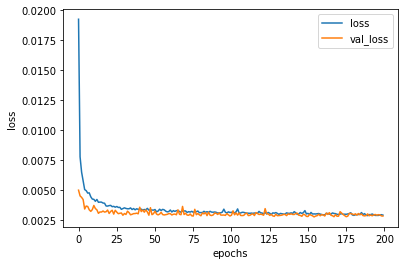

In [29]:
plt.plot(model.history.history['loss'],label = 'loss')
plt.plot(model.history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

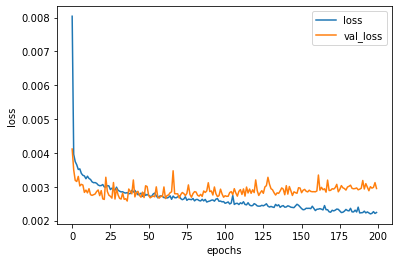

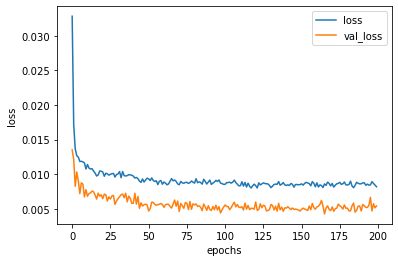

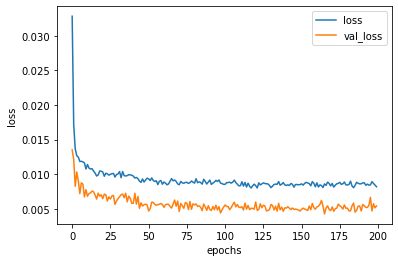

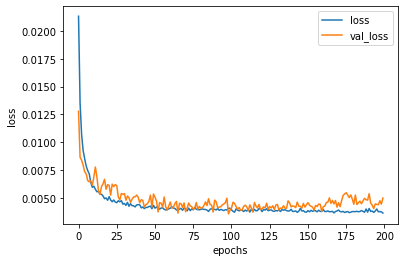

In [30]:
from sklearn.metrics import r2_score

predicted_result = model.predict(test_data)
r2 = r2_score(test_target,predicted_result)
print('r2_score:', r2)

r2_score: 0.8856058477753036


In [34]:
print('actual: ',test_target[:10].T)
print('predicted: ',predicted_result[:10].T)

actual:  [[0.54630715 0.51699883 0.32590856 0.17350528 0.22626026 0.24501758
  0.22508792 0.06799531 0.014068   0.05275498]]
predicted:  [[0.32696226 0.41480115 0.30902195 0.25965545 0.29969797 0.22156921
  0.18280154 0.06373084 0.01202563 0.05968172]]


In [35]:
print('actual inverst scaaled', scaler_target.inverse_transform(test_target[:10].T))
print('presictec inverst scaaled', scaler_target.inverse_transform(predicted_result[:10].T))

actual inverst scaaled [[46.7 44.2 27.9 14.9 19.4 21.  19.3  5.9  1.3  4.6]]
presictec inverst scaaled [[27.989882  35.48254   26.459572  22.24861   25.664236  18.999853
  15.692972   5.536241   1.1257864  5.1908507]]


In [43]:
my_test_data = [1,56,156,42,0,1,0]

my_test_data = scaler_data.transform([my_test_data])

result = model.predict(my_test_data)
print('result: ',result)

predicted = scaler_target.inverse_transform(result)
print('predicted result: ',predicted)

result:  [[0.0223381]]
predicted result:  [[2.0054398]]
